In [2]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)


2.12.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [6]:
# Directory with our fresh data training pictures
train_fresh_guava_dir = os.path.join(train_dir, 'Fresh_Guava')
train_fresh_lemon_dir = os.path.join(train_dir, 'Fresh_Lemon')
train_fresh_lime_dir = os.path.join(train_dir, 'Fresh_Lime')
train_fresh_mango_dir = os.path.join(train_dir, 'Fresh_Mango')
train_fresh_strawberry_dir = os.path.join(train_dir, 'Fresh_Strawberry')
train_fresh_apple_dir = os.path.join(train_dir, 'fresh_apple')
train_fresh_banana_dir = os.path.join(train_dir, 'fresh_banana')
train_fresh_bellpepper_dir = os.path.join(train_dir, 'fresh_bellpepper')
train_fresh_capsicum_dir = os.path.join(train_dir, 'fresh_capsicum')
train_fresh_carrot_dir = os.path.join(train_dir, 'fresh_carrot')
train_fresh_cucumber_dir = os.path.join(train_dir, 'fresh_cucumber')
train_fresh_orange_dir = os.path.join(train_dir, 'fresh_orange')
train_fresh_pomegranate_dir = os.path.join(train_dir, 'fresh_pomegranate')
train_fresh_potato_dir = os.path.join(train_dir, 'fresh_potato')
train_fresh_tomato_dir = os.path.join(train_dir, 'fresh_tomato')



# Directory with our Rotten data training pictures
train_rotten_guava_dir = os.path.join(train_dir, 'Rotten Guava')
train_rotten_lemon_dir = os.path.join(train_dir, 'Rotten_Lemon')
train_rotten_lime_dir = os.path.join(train_dir, 'Rotten_Lime')
train_rotten_mango_dir = os.path.join(train_dir, 'Rotten_Mango')
train_rotten_strawberry_dir = os.path.join(train_dir, 'Rotten_Strawberry')

train_rotten_apple_dir = os.path.join(train_dir, 'rotten_apple')
train_rotten_banana_dir = os.path.join(train_dir, 'rotten_banana')
train_rotten_bellpepper_dir = os.path.join(train_dir, 'stale_bellpepper')
train_rotten_capsicum_dir = os.path.join(train_dir, 'stale_capsicum')
train_rotten_carrot_dir = os.path.join(train_dir, 'stale_carrot')
train_rotten_cucumber_dir = os.path.join(train_dir, 'rotten_cucumber')
train_rotten_orange_dir = os.path.join(train_dir, 'rotten_orange')
train_rotten_pomegranate_dir = os.path.join(train_dir, 'stale_pomegranate')
train_rotten_potato_dir = os.path.join(train_dir, 'stale_potato')
train_rotten_tomato_dir = os.path.join(train_dir, 'rotten_tomato')

In [7]:
# Directory with our fresh data validation pictures
validation_fresh_guava_dir = os.path.join(validation_dir, 'Fresh_Guava')
validation_fresh_lemon_dir = os.path.join(validation_dir, 'Fresh_Lemon')
validation_fresh_lime_dir = os.path.join(validation_dir, 'Fresh_Lime')
validation_fresh_mango_dir = os.path.join(validation_dir, 'Fresh_Mango')
validation_fresh_strawberry_dir = os.path.join(validation_dir, 'Fresh_Strawberry')
validation_fresh_apple_dir = os.path.join(validation_dir, 'fresh_apple')
validation_fresh_banana_dir = os.path.join(validation_dir, 'fresh_banana')
validation_fresh_bellpepper_dir = os.path.join(validation_dir, 'fresh_bellpepper')
validation_fresh_capsicum_dir = os.path.join(validation_dir, 'fresh_capsicum')
validation_fresh_carrot_dir = os.path.join(validation_dir, 'fresh_carrot')
validation_fresh_cucumber_dir = os.path.join(validation_dir, 'fresh_cucumber')
validation_fresh_orange_dir = os.path.join(validation_dir, 'fresh_orange')
validation_fresh_pomegranate_dir = os.path.join(validation_dir, 'fresh_pomegranate')
validation_fresh_potato_dir = os.path.join(validation_dir, 'fresh_potato')
validation_fresh_tomato_dir = os.path.join(validation_dir, 'fresh_tomato')



# Directory with our Rotten data validation pictures
validation_rotten_guava_dir = os.path.join(validation_dir, 'Rotten Guava')
validation_rotten_lemon_dir = os.path.join(validation_dir, 'Rotten_Lemon')
validation_rotten_lime_dir = os.path.join(validation_dir, 'Rotten_Lime')
validation_rotten_mango_dir = os.path.join(validation_dir, 'Rotten_Mango')
validation_rotten_strawberry_dir = os.path.join(validation_dir, 'Rotten_Strawberry')

validation_rotten_apple_dir = os.path.join(validation_dir, 'rotten_apple')
validation_rotten_banana_dir = os.path.join(validation_dir, 'rotten_banana')
validation_rotten_bellpepper_dir = os.path.join(validation_dir, 'stale_bellpepper')
validation_rotten_capsicum_dir = os.path.join(validation_dir, 'stale_capsicum')
validation_rotten_carrot_dir = os.path.join(validation_dir, 'stale_carrot')
validation_rotten_cucumber_dir = os.path.join(validation_dir, 'rotten_cucumber')
validation_rotten_orange_dir = os.path.join(validation_dir, 'rotten_orange')
validation_rotten_pomegranate_dir = os.path.join(validation_dir, 'stale_pomegranate')
validation_rotten_potato_dir = os.path.join(validation_dir, 'stale_potato')
validation_rotten_tomato_dir = os.path.join(validation_dir, 'rotten_tomato')


In [8]:
#Train Fresh
print(f"There are {len(os.listdir(train_fresh_guava_dir))} images of fresh guava for train")
print(f"There are {len(os.listdir(train_fresh_lemon_dir))} images of fresh lemon for train")
print(f"There are {len(os.listdir(train_fresh_lime_dir))} images of fresh lime for train")
print(f"There are {len(os.listdir(train_fresh_mango_dir))} images of fresh mango for train")
print(f"There are {len(os.listdir(train_fresh_strawberry_dir))} images of fresh strawberry for train")
print(f"There are {len(os.listdir(train_fresh_apple_dir))} images of fresh apples for train")
print(f"There are {len(os.listdir(train_fresh_banana_dir))} images of fresh banana for train")
print(f"There are {len(os.listdir(train_fresh_bellpepper_dir))} images fresh of bellpepper for train")
print(f"There are {len(os.listdir(train_fresh_capsicum_dir))} images of fresh capsicum for train")
print(f"There are {len(os.listdir(train_fresh_carrot_dir))} images of fresh carrot for train")
print(f"There are {len(os.listdir(train_fresh_cucumber_dir))} images fresh of cucumber for train")
print(f"There are {len(os.listdir(train_fresh_orange_dir))} images of fresh orange for train")
print(f"There are {len(os.listdir(train_fresh_pomegranate_dir))} images of fresh pomegranate for train")
print(f"There are {len(os.listdir(train_fresh_potato_dir))} images of fresh potato for train")
print(f"There are {len(os.listdir(train_fresh_tomato_dir))} images of fresh tomato for train")

#Train Rotten
print(f"There are {len(os.listdir(train_rotten_guava_dir))} images of rotten guava for train")
print(f"There are {len(os.listdir(train_rotten_lemon_dir))} images of rotten lemon for train")
print(f"There are {len(os.listdir(train_rotten_lime_dir))} images of rotten lime for train")
print(f"There are {len(os.listdir(train_rotten_mango_dir))} images of rotten mango for train")
print(f"There are {len(os.listdir(train_rotten_strawberry_dir))} images of rotten strawberry for train")
print(f"There are {len(os.listdir(train_rotten_apple_dir))} images of rotten apples for train")
print(f"There are {len(os.listdir(train_rotten_banana_dir))} images of rotten banana for train")
print(f"There are {len(os.listdir(train_rotten_bellpepper_dir))} images rotten of bellpepper for train")
print(f"There are {len(os.listdir(train_rotten_capsicum_dir))} images of rotten capsicum for train")
print(f"There are {len(os.listdir(train_rotten_carrot_dir))} images of rotten carrot for train")
print(f"There are {len(os.listdir(train_rotten_cucumber_dir))} images rotten of cucumber for train")
print(f"There are {len(os.listdir(train_rotten_orange_dir))} images of rotten orange for train")
print(f"There are {len(os.listdir(train_rotten_pomegranate_dir))} images of rotten pomegranate for train")
print(f"There are {len(os.listdir(train_rotten_potato_dir))} images of rotten potato for train")
print(f"There are {len(os.listdir(train_rotten_tomato_dir))} images of rotten tomato for train")

#Validation Fresh
print(f"There are {len(os.listdir(validation_fresh_guava_dir))} images of fresh guava for validation")
print(f"There are {len(os.listdir(validation_fresh_lemon_dir))} images of fresh lemon for validation")
print(f"There are {len(os.listdir(validation_fresh_lime_dir))} images of fresh lime for validation")
print(f"There are {len(os.listdir(validation_fresh_mango_dir))} images of fresh mango for validation")
print(f"There are {len(os.listdir(validation_fresh_strawberry_dir))} images of fresh strawberry for validation")
print(f"There are {len(os.listdir(validation_fresh_apple_dir))} images of fresh apples for validation")
print(f"There are {len(os.listdir(validation_fresh_banana_dir))} images of fresh banana for validation")
print(f"There are {len(os.listdir(validation_fresh_bellpepper_dir))} images fresh of bellpepper for validation")
print(f"There are {len(os.listdir(validation_fresh_capsicum_dir))} images of fresh capsicum for validation")
print(f"There are {len(os.listdir(validation_fresh_carrot_dir))} images of fresh carrot for validation")
print(f"There are {len(os.listdir(validation_fresh_cucumber_dir))} images fresh of cucumber for validation")
print(f"There are {len(os.listdir(validation_fresh_orange_dir))} images of fresh orange for validation")
print(f"There are {len(os.listdir(validation_fresh_pomegranate_dir))} images of fresh pomegranate for validation")
print(f"There are {len(os.listdir(validation_fresh_potato_dir))} images of fresh potato for validation")
print(f"There are {len(os.listdir(validation_fresh_tomato_dir))} images of fresh tomato for validation")

#Validation Rotten
print(f"There are {len(os.listdir(validation_rotten_guava_dir))} images of rotten guava for validation")
print(f"There are {len(os.listdir(validation_rotten_lemon_dir))} images of rotten lemon for validation")
print(f"There are {len(os.listdir(validation_rotten_lime_dir))} images of rotten lime for validation")
print(f"There are {len(os.listdir(validation_rotten_mango_dir))} images of rotten mango for validation")
print(f"There are {len(os.listdir(validation_rotten_strawberry_dir))} images of rotten strawberry for validation")
print(f"There are {len(os.listdir(validation_rotten_apple_dir))} images of rotten apples for validation")
print(f"There are {len(os.listdir(validation_rotten_banana_dir))} images of rotten banana for validation")
print(f"There are {len(os.listdir(validation_rotten_bellpepper_dir))} images rotten of bellpepper for validation")
print(f"There are {len(os.listdir(validation_rotten_capsicum_dir))} images of rotten capsicum for validation")
print(f"There are {len(os.listdir(validation_rotten_carrot_dir))} images of rotten carrot for validation")
print(f"There are {len(os.listdir(validation_rotten_cucumber_dir))} images rotten of cucumber for validation")
print(f"There are {len(os.listdir(validation_rotten_orange_dir))} images of rotten orange for validation")
print(f"There are {len(os.listdir(validation_rotten_pomegranate_dir))} images of rotten pomegranate for validation")
print(f"There are {len(os.listdir(validation_rotten_potato_dir))} images of rotten potato for validation")
print(f"There are {len(os.listdir(validation_rotten_tomato_dir))} images of rotten tomato for validation")

There are 1052 images of fresh guava for train
There are 900 images of fresh lemon for train
There are 994 images of fresh lime for train
There are 900 images of fresh mango for train
There are 900 images of fresh strawberry for train
There are 1354 images of fresh apples for train
There are 1264 images of fresh banana for train
There are 488 images fresh of bellpepper for train
There are 1197 images of fresh capsicum for train
There are 496 images of fresh carrot for train
There are 486 images fresh of cucumber for train
There are 1178 images of fresh orange for train
There are 4753 images of fresh pomegranate for train
There are 1028 images of fresh potato for train
There are 784 images of fresh tomato for train
There are 1030 images of rotten guava for train
There are 900 images of rotten lemon for train
There are 985 images of rotten lime for train
There are 900 images of rotten mango for train
There are 900 images of rotten strawberry for train
There are 1888 images of rotten appl

In [9]:
labels = []
for label in os.listdir(train_dir):
  labels.append(label)

NUM_LABELS = len(labels)
print(NUM_LABELS)
print(labels)

30
['Rotten Guava', 'Fresh_Mango', 'Fresh_Strawberry', 'Rotten_Lemon', 'Rotten_Mango', 'Rotten_Lime', 'Rotten_Strawberry', 'Fresh_Guava', 'Fresh_Lemon', 'Fresh_Lime', 'fresh_apple', 'fresh_banana', 'fresh_cucumber', 'fresh_orange', 'fresh_tomato', 'rotten_apple', 'rotten_banana', 'rotten_cucumber', 'rotten_orange', 'rotten_tomato', 'fresh_potato', 'fresh_bellpepper', 'fresh_capsicum', 'fresh_carrot', 'fresh_pomegranate', 'stale_capsicum', 'stale_carrot', 'stale_bellpepper', 'stale_pomegranate', 'stale_potato']


In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size = 32,
                                                      shuffle = True,
                                                      classes = labels,
                                                      class_mode='categorical',
                                                      target_size=(150,150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=1,
                                                                classes=labels,
                                                                class_mode='categorical',
                                                                target_size=(150,150))

Found 33172 images belonging to 30 classes.
Found 4981 images belonging to 30 classes.


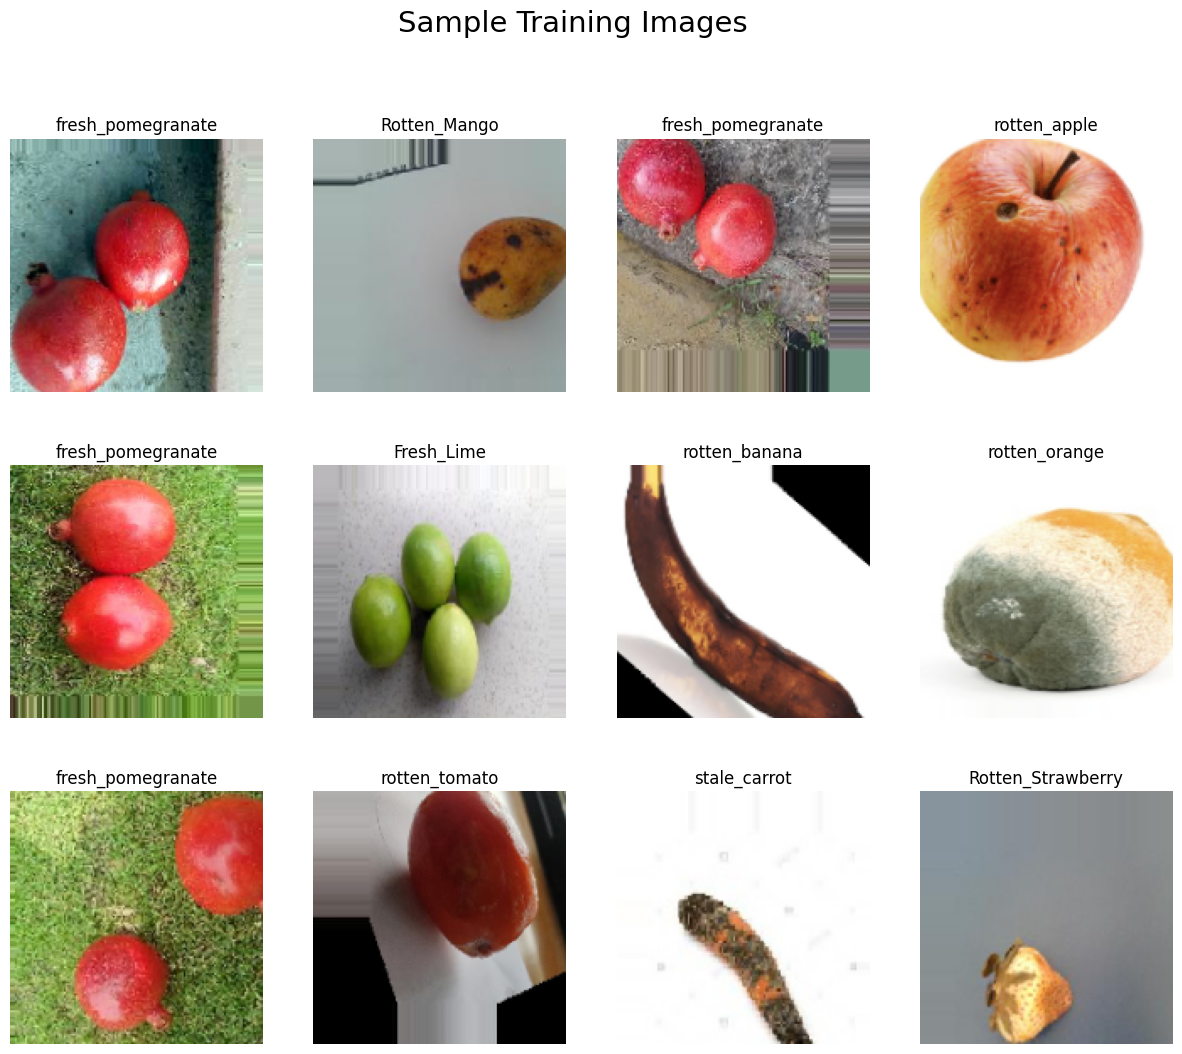

In [11]:

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [12]:
# Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(30, activation='sigmoid')
])

In [13]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [14]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='softmax')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 512)               44859904  
                                                                 
 dense_1 (Dense)             (None, 30)                15390     
                                                                 
Total params: 44,875,742
Trainable params: 44,875,742
Non-trainable params: 0
____________________________________________

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [19]:
train_len = 0
for foldername in os.listdir(train_dir):
    train_len = train_len + len(os.listdir(os.path.join(train_dir,foldername)))
    
val_len = 0
for foldername in os.listdir(validation_dir):
    val_len = val_len + len(os.listdir(os.path.join(validation_dir,foldername)))

print(train_len)
print(val_len)

31976
4981


In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=15,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/15
999/999 [==============================] - 7932s 8s/step - loss: 2.0373 - accuracy: 0.4029 - val_loss: 1.4794 - val_accuracy: 0.5705
Epoch 2/15
999/999 [==============================] - 1649s 2s/step - loss: 1.2959 - accuracy: 0.5943 - val_loss: 1.3691 - val_accuracy: 0.6410
Epoch 3/15
999/999 [==============================] - 1556s 2s/step - loss: 1.0422 - accuracy: 0.6676 - val_loss: 1.2134 - val_accuracy: 0.7051
Epoch 4/15
999/999 [==============================] - 1594s 2s/step - loss: 0.9061 - accuracy: 0.7031 - val_loss: 1.4167 - val_accuracy: 0.7115
Epoch 5/15
999/999 [==============================] - 1623s 2s/step - loss: 0.8221 - accuracy: 0.7287 - val_loss: 1.0158 - val_accuracy: 0.7628
Epoch 6/15
999/999 [==============================] - 1640s 2s/step - loss: 0.7628 - accuracy: 0.7466 - val_loss: 1.3118 - val_accuracy: 0.7436
Epoch 7/15
999/999 [==============================] - 1646s 2s/step - loss: 0.7087 - accuracy: 0.7620 - val_loss: 1.2355 - val_accuracy:

<Figure size 640x480 with 0 Axes>

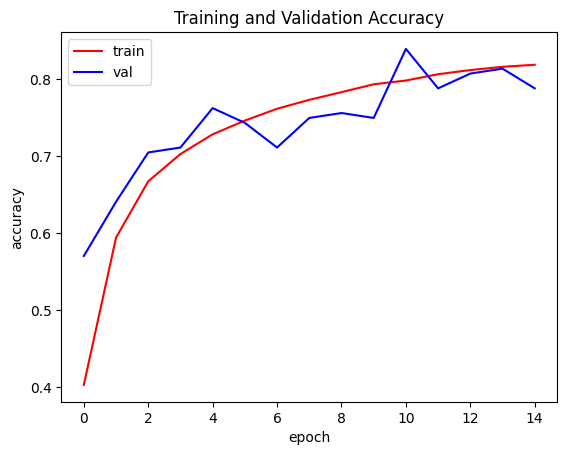

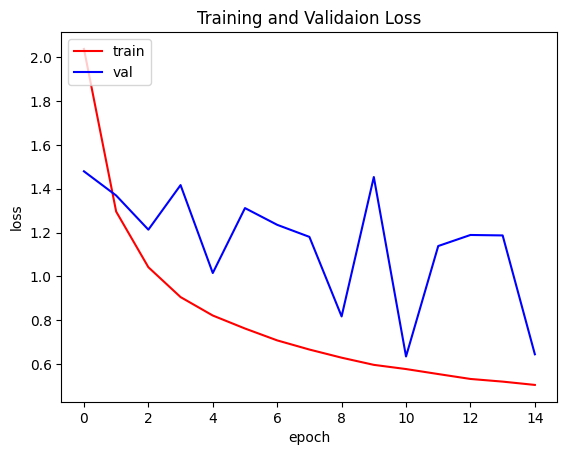

<Figure size 640x480 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)

print('\nValidation accuracy:', val_acc)

 519/4981 [==>...........................] - ETA: 18:12 - loss: 0.8820 - accuracy: 0.8150

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  classes = np.argmax(classes,axis=1)

  print(labels[classes[0]])
  
  #print(classes[0])